<a href="https://colab.research.google.com/github/Seowoo-Jung/ESAA/blob/main/SVM_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2. 서포트 벡터가 무엇인가요?**

**답** :

:경계에 위치한 샘플에 의해 경계를 결정하고 이들이 최대한 멀리 떨어지도록 하여 분류 혹은 회귀를 하는 기법.

**3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?**

**답** :

 SVM은 스케일에 민감하기 때문에 스케일을 맞춰주면 결정경계가 좋아진다.

 - 훈련세트의 스케일이 맞지 않으면 크기가 작은 특성을 무시하는 경향이 있다.

**8. 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.**

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [27]:
# iris data를 로드하고 x,y를 지정해줍니다.
#(힌트: 핸즈온 머신러닝 교재 208쪽 참고)
iris=datasets.load_iris()
X=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)

In [28]:
C = 5 
alpha = 1 / (C * len(X))


In [29]:
# LinearSVC 학습하기
lin_svc = LinearSVC(loss='hinge',C=C,random_state=42)
svc = SVC(kernel='linear',C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate = 'constant', eta0=0.001, tol=1e-3,alpha=alpha,
                       max_iter=100000, random_state=42)

# 위를 이용하여 데이터 스케일링 후 LinearSVC,SVC,SGDClassifier 구하기
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

lin_svc.fit(X_scaled, y)
svc.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)


SGDClassifier(alpha=0.0013333333333333333, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='hinge',
              max_iter=100000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
?lin_svc

In [31]:
print('linear:', lin_svc.coef_, lin_svc.intercept_)
print('svc:', svc.coef_, svc.intercept_)
print('sgd_clf:', sgd_clf.coef_, sgd_clf.intercept_)

linear: [[2.19679117 3.16730946]] [-3.17999994]
svc: [[2.84187135 3.29080461]] [-3.71602789]
sgd_clf: [[0.97438163 1.33109798]] [-1.394]



- 기울기와 편향 계산시 coef이용하는법

https://datascience.stackexchange.com/questions/17970/how-can-i-know-how-to-interpret-the-output-coefficients-coefs-from-the-mode



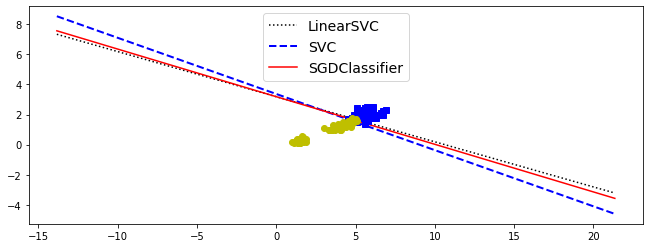

In [32]:
# 세 개 모델의 결정 경계를 그리기
# 먼저 결정 결제들의 기울기(W)와 편향(b)을 구함

w1= -lin_svc.coef_[0,0] / lin_svc.coef_[0,1]
b2= -lin_svc.intercept_[0]/ lin_svc.coef_[0,1]

w2= -svc.coef_[0,0] / svc.coef_[0,1]
b1= -svc.intercept_[0]/ svc.coef_[0,1]

w3= -sgd_clf.coef_[0,0] / sgd_clf.coef_[0,1]
b3= -sgd_clf.intercept_[0]/ sgd_clf.coef_[0,1]


# 결정 결계를 원본 스케일로 변환하기 : inverse_transform
line1=scaler.inverse_transform([[-10, -10*w1+b1], [10, 10*w1+b1]]) # 직선을 그리기 위해 임의의 두점을 설정한것!
line2=scaler.inverse_transform([[-10, -10*w2+b2], [10, 10*w2+b2]])
line3=scaler.inverse_transform([[-10, -10*w3+b3], [10, 10*w3+b3]])

# 세 개의 결정 경계를 모두 그리기
plt.figure(figsize=(11,4))
plt.plot(line1[:,0], line1[:,1],'k:', label="LinearSVC")
plt.plot(line2[:,0], line2[:,1],'b--', linewidth=2, label="SVC")
plt.plot(line3[:,0], line3[:,1],'r-', label="SGDClassifier")

plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo')
plt.legend(loc="upper center", fontsize=14)



# 아주 비슷한 결정 경계를 보인다. 

In [ ]:
# 너무 어려울 경우 https://leechamin.tistory.com/83 참고 